Importing Packages

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

Importing Data-Set

In [2]:
data=pd.read_csv(r"./covid_19_india.csv")

Checking for Data Format

In [3]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


Checking if Data-Felids are Null

In [4]:
data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

Discription of data

In [5]:
data.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


Checking Information & Data-types of Coulumns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


Ploting confirmed cases on all dates acrosses all states that represents the mean of all states using Package Seaborn


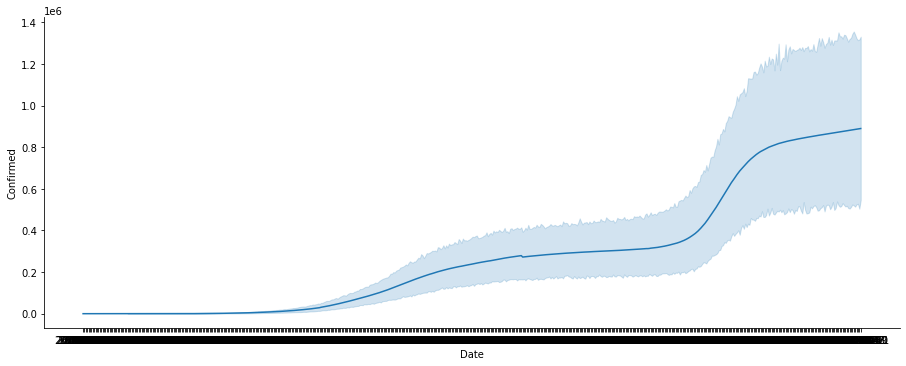

In [7]:
sns.relplot(x="Date",y="Confirmed",data=data,kind='line', aspect=20/8)

Calculating dates list and increasing no. of cases day by day

In [8]:
date=list(data['Date'].value_counts().index)
date=sorted(date)
cases=[]
for i in range(len(date)):
    c=0
    for j in range(len(data['Date'])):
        if date[i]==data['Date'][j]:
            c+=data['Confirmed'][j]
    cases.append(c)

Calculating no. of cases reported each day

In [9]:
case=[]
case.append(cases[0])
for i in range(1,len(date)):
    case.append(cases[i]-cases[i-1])

Cases increasing pattern from all states

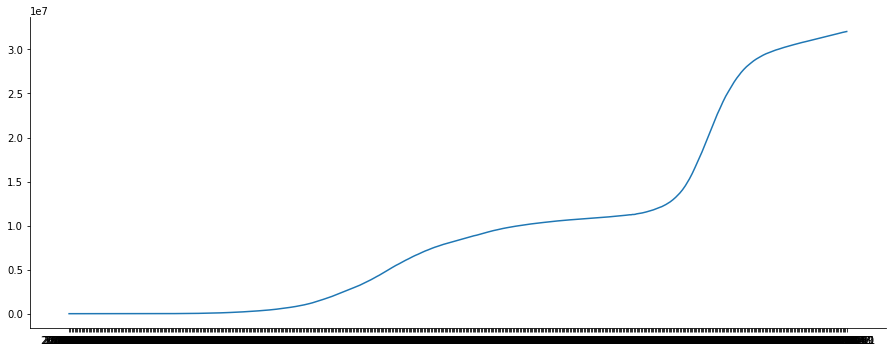

In [10]:
sns.relplot(x=date,y=cases, kind='line', aspect=20/8)

Every day cases plot

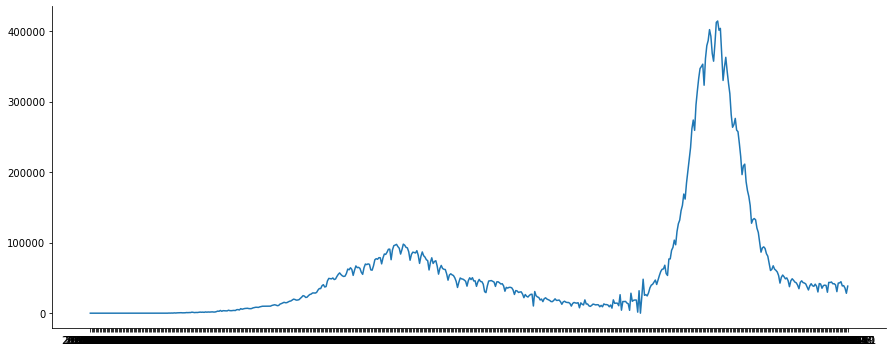

In [11]:
sns.relplot(x=date,y=case, kind='line', aspect=20/8)

Creating interactive function for selecting plots to be displayed each State

In [12]:
@interact

def compare(state=['All States','Kerala', 'Delhi', 'Rajasthan', 'Haryana', 'Uttar Pradesh',
       'Tamil Nadu', 'Ladakh', 'Jammu and Kashmir', 'Punjab', 'Maharashtra',
       'Karnataka', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry',
       'West Bengal', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'Madhya Pradesh', 'Himachal Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Goa', 'Andaman and Nicobar Islands', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Nagaland', 'Sikkim',
       'Telengana', 'Lakshadweep', 'Telangana',
       'Dadra and Nagar Haveli', 'Bihar****', 'Daman & Diu', 'Maharashtra***',
       'Himanchal Pradesh', 'Karanataka', 'Madhya Pradesh***',
       'Cases being reassigned to states', 'Unassigned']):
    if state=='All States':
        date=list(data['Date'].value_counts().index)
        date=sorted(date)
        cases=[]
        for i in range(len(date)):
            c=0
            for j in range(len(data['Date'])):
                if date[i]==data['Date'][j]:
                    c+=data['Confirmed'][j]
            cases.append(c)
        print("          All States       ")
        sns.relplot(x=date,y=cases, kind='line', aspect=20/8)
    else:
        x=data[data['State/UnionTerritory']==state]
        print("          ",state,"       ")
        sns.relplot(x=x['Date'],y=x['Confirmed'], kind='line', aspect=20/8)

interactive(children=(Dropdown(description='state', options=('All States', 'Kerala', 'Delhi', 'Rajasthan', 'Ha…

Creating interactive function for selecting plots to be displayed each State for changing everyday pattern

In [15]:
@interact

def compare(state=['All States','Kerala', 'Delhi', 'Rajasthan', 'Haryana', 'Uttar Pradesh',
       'Tamil Nadu', 'Ladakh', 'Jammu and Kashmir', 'Punjab', 'Maharashtra',
       'Karnataka', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry',
       'West Bengal', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'Madhya Pradesh', 'Himachal Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Goa', 'Andaman and Nicobar Islands', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Nagaland', 'Sikkim',
       'Telengana', 'Lakshadweep', 'Telangana',
       'Dadra and Nagar Haveli', 'Bihar****', 'Daman & Diu', 'Maharashtra***',
       'Himanchal Pradesh', 'Karanataka', 'Madhya Pradesh***',
       'Cases being reassigned to states', 'Unassigned']):
    if state=='All States':
        date=list(data['Date'].value_counts().index)
        date=sorted(date)
        cases=[]
        for i in range(len(date)):
            c=0
            for j in range(len(data['Date'])):
                if date[i]==data['Date'][j]:
                    c+=data['Confirmed'][j]
            cases.append(c)
        case=[]
        case.append(cases[0])
        for i in range(1,len(date)):
            case.append(cases[i]-cases[i-1])
        print("          All States       ")
        sns.relplot(x=date,y=case, kind='line', aspect=20/8)
    else:
        x=data[data['State/UnionTerritory']==state]
        print("          ",state,"       ")
        date=list(x['Date'].value_counts().index)
        date=sorted(date)
        cases=[]
        for i in list(x['Confirmed']):
            cases.append(i)
        case=[]
        case.append(cases[0])
        for i in range(1,len(date)):
            case.append(cases[i]-cases[i-1])
        sns.relplot(x=date,y=case, kind='line', aspect=20/8)

interactive(children=(Dropdown(description='state', options=('All States', 'Kerala', 'Delhi', 'Rajasthan', 'Ha…